# Wasserstein

In [ ]:
using Plots
using Random
using StatsBase
using LinearAlgebra
using Printf
using Revise
using Hungarian

In [ ]:
# Other similarites
Revise.includet("wasserstein.jl")
# Bivariate normal
include("bivariate.jl")
Revise.includet("datasets.jl")

## Generate data

https://www.probabilitycourse.com/chapter5/5_3_2_bivariate_normal_dist.php

The following are correlated with $r$:

$$
X = \mu_X + \sigma_X Z_1 \\
Y = \mu_Y + \sigma_Y \left(r Z_1 + \sqrt{1-r^2}Z_2 \right)
$$

In [ ]:
μ1, σ1, r1, n1 = (0.0, 0.0), (1.0, 1.0), 0.0, 250
μ2, σ2, r2, n2 = (0.0, 0.0), (3.0, 3.0), -0.6, 250

x1, y1 = correlated_bivariate_normal(μ1, σ1, r1, n1);
x2, y2 = correlated_bivariate_normal(μ2, σ2, r2, n2);

println(cor(x1, y1))
println(cor(x2, y2))

0.07592830584082723
-0.6146037839814787


## Plot

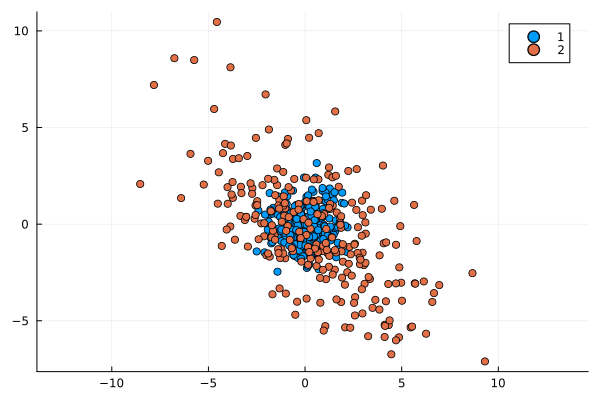

In [ ]:
double_plot = scatter(x1, y1, aspect=:equal, label="1", aspectratio=:equal)
scatter!(double_plot, x2, y2, label="2")

In [ ]:
points1 = permutedims(hcat(x1, y1));
points2 = permutedims(hcat(x2, y2));

## Hungarian

In [ ]:
function make_distance_matrix_vectorised(points1::AbstractMatrix, points2::AbstractMatrix)
    square1 = transpose(sum(points1 .* points1, dims=1))
    square2 = sum(points2 .* points2, dims=1)
    distance_matrix = square1 .- 2 * transpose(points1) * points2 .+ square2
    distance_matrix
end

make_distance_matrix_vectorised (generic function with 1 method)

In [ ]:
D = make_distance_matrix_vectorised(points1, points2);

In [ ]:
assignments, cost = hungarian(D)
hungarian_sim = cost / min(size(D)...)

9.274734927465214

## Wasserstein

In [ ]:
wasserstein_sim = gaussian_wasserstein_metric(points1, points2)

9.096409615355988

In [ ]:
info = @sprintf("Hungarian: %.2f\nApproximation: %.2f", hungarian_sim, wasserstein_sim)

"Hungarian: 9.27\nApproximation: 9.10"

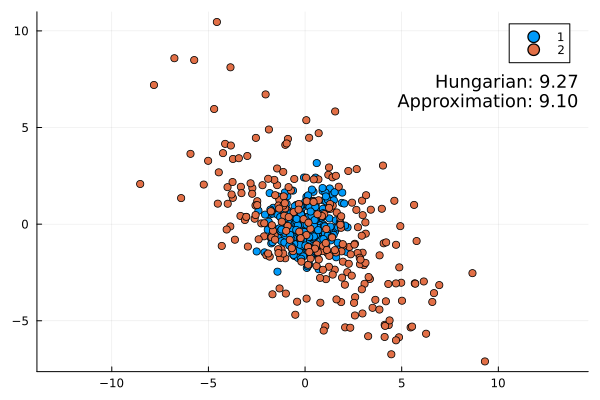

In [ ]:
annotate!(double_plot, ((0.98, 0.78), Plots.text(info, 12, :right)))